#                                    珠海市短租房租金的影响分析

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
import random
import warnings
from scipy import stats
from numpy import corrcoef,array
import statsmodels.api as sm
from statsmodels.formula.api import ols
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False 

In [2]:
#-*- coding : utf-8 -*-
# coding: utf-8
zhuhai_house = pd.read_csv("./Data/zhuhai_house.csv",encoding='gbk')
zhuhai_house

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
0,香洲区,老香洲,华海路46号,40.00,南,1室1厅1卫,1室,1厅,1卫,10888,整租,/精装/随时看房/,无,免费车位,商水,商电,无
1,香洲区,唐家湾,保利海上五月花2期,38.00,北,1室1厅1卫,1室,1厅,1卫,10860,整租,/精装/随时看房/,有,免费车位,民水,民电,有
2,香洲区,前山,梅花豪庭,33.45,北,1室0厅1卫,1室,0厅,1卫,10500,整租,/,有,免费车位,民水,民电,有
3,香洲区,前山,蔚蓝东岸,47.00,南,1室1厅1卫,1室,1厅,1卫,10500,整租,/精装/,有,免费车位,民水,民电,有
4,香洲区,唐家湾,恒隆华萃园,37.00,南,1室1厅1卫,1室,1厅,1卫,10335,整租,/精装/随时看房/,有,租用车位,商水,商电,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13968,斗门区,白蕉,西江月,83.56,东南西南,2室2厅1卫,2室,2厅,1卫,200,整租,/新上/精装/,无,免费车位,民水,民电,有
13969,斗门区,白蕉,中邦城市美墅,290.98,东南,5室2厅4卫,5室,2厅,4卫,200,整租,/新上/精装/,无,免费车位,商水,商电,无
13970,斗门区,乾务,富逸花园,26.00,东南,1室1厅1卫,1室,1厅,1卫,180,整租,/新上/精装/,无,免费车位,商水,商电,无
13971,斗门区,白蕉,家和城二期,118.00,南北,4室2厅2卫,4室,2厅,2卫,150,整租,/新上/精装/双卫生间/,有,免费车位,民水,民电,有


In [3]:
zhuhai_house.head()

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
0,香洲区,老香洲,华海路46号,40.00,南,1室1厅1卫,1室,1厅,1卫,10888,整租,/精装/随时看房/,无,免费车位,商水,商电,无
1,香洲区,唐家湾,保利海上五月花2期,38.00,北,1室1厅1卫,1室,1厅,1卫,10860,整租,/精装/随时看房/,有,免费车位,民水,民电,有
2,香洲区,前山,梅花豪庭,33.45,北,1室0厅1卫,1室,0厅,1卫,10500,整租,/,有,免费车位,民水,民电,有
3,香洲区,前山,蔚蓝东岸,47.00,南,1室1厅1卫,1室,1厅,1卫,10500,整租,/精装/,有,免费车位,民水,民电,有
4,香洲区,唐家湾,恒隆华萃园,37.00,南,1室1厅1卫,1室,1厅,1卫,10335,整租,/精装/随时看房/,有,租用车位,商水,商电,有


In [4]:
print(f'样本量共有{zhuhai_house.shape[0]}个')

样本量共有13973个


In [5]:
zhuhai_house.duplicated().sum()

326

In [6]:
zhuhai_house.isnull().sum()

dist            0
town            0
village         1
area            0
orientations    0
room            0
bedroom         0
living_room     0
washing_room    0
rent            0
lease_mode      0
label           0
elevator        0
parking         0
water           0
electricity     0
gas             0
dtype: int64

In [7]:
zhuhai_house.dtypes

dist             object
town             object
village          object
area            float64
orientations     object
room             object
bedroom          object
living_room      object
washing_room     object
rent              int64
lease_mode       object
label            object
elevator         object
parking          object
water            object
electricity      object
gas              object
dtype: object

In [8]:
zhuhai_house.drop_duplicates(inplace=True)

In [9]:
zhuhai_house.duplicated().sum()

0

In [10]:
zhuhai_house = zhuhai_house.dropna()
zhuhai_house

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
0,香洲区,老香洲,华海路46号,40.00,南,1室1厅1卫,1室,1厅,1卫,10888,整租,/精装/随时看房/,无,免费车位,商水,商电,无
1,香洲区,唐家湾,保利海上五月花2期,38.00,北,1室1厅1卫,1室,1厅,1卫,10860,整租,/精装/随时看房/,有,免费车位,民水,民电,有
2,香洲区,前山,梅花豪庭,33.45,北,1室0厅1卫,1室,0厅,1卫,10500,整租,/,有,免费车位,民水,民电,有
3,香洲区,前山,蔚蓝东岸,47.00,南,1室1厅1卫,1室,1厅,1卫,10500,整租,/精装/,有,免费车位,民水,民电,有
4,香洲区,唐家湾,恒隆华萃园,37.00,南,1室1厅1卫,1室,1厅,1卫,10335,整租,/精装/随时看房/,有,租用车位,商水,商电,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13968,斗门区,白蕉,西江月,83.56,东南西南,2室2厅1卫,2室,2厅,1卫,200,整租,/新上/精装/,无,免费车位,民水,民电,有
13969,斗门区,白蕉,中邦城市美墅,290.98,东南,5室2厅4卫,5室,2厅,4卫,200,整租,/新上/精装/,无,免费车位,商水,商电,无
13970,斗门区,乾务,富逸花园,26.00,东南,1室1厅1卫,1室,1厅,1卫,180,整租,/新上/精装/,无,免费车位,商水,商电,无
13971,斗门区,白蕉,家和城二期,118.00,南北,4室2厅2卫,4室,2厅,2卫,150,整租,/新上/精装/双卫生间/,有,免费车位,民水,民电,有


In [11]:
zhuhai_house.isnull().sum()

dist            0
town            0
village         0
area            0
orientations    0
room            0
bedroom         0
living_room     0
washing_room    0
rent            0
lease_mode      0
label           0
elevator        0
parking         0
water           0
electricity     0
gas             0
dtype: int64

In [12]:
print(zhuhai_house.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13646 entries, 0 to 13972
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dist          13646 non-null  object 
 1   town          13646 non-null  object 
 2   village       13646 non-null  object 
 3   area          13646 non-null  float64
 4   orientations  13646 non-null  object 
 5   room          13646 non-null  object 
 6   bedroom       13646 non-null  object 
 7   living_room   13646 non-null  object 
 8   washing_room  13646 non-null  object 
 9   rent          13646 non-null  int64  
 10  lease_mode    13646 non-null  object 
 11  label         13646 non-null  object 
 12  elevator      13646 non-null  object 
 13  parking       13646 non-null  object 
 14  water         13646 non-null  object 
 15  electricity   13646 non-null  object 
 16  gas           13646 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 1.9+ MB
None


In [13]:
zhuhai_house["rent"]

0        10888
1        10860
2        10500
3        10500
4        10335
         ...  
13968      200
13969      200
13970      180
13971      150
13972      100
Name: rent, Length: 13646, dtype: int64

In [14]:
zhuhai_house.describe()

,area,rent
count,13646.000000,13646.000000
mean,89.355213,3397.097904
std,40.380018,1694.274787
min,8.000000,100.000000
25%,62.000000,2200.000000
50%,89.000000,3000.000000
75%,107.000000,4300.000000
max,520.000000,10888.000000


In [15]:
print(f'样本量共有{zhuhai_house.shape[0]}个')

样本量共有13646个


In [16]:
zhuhai_house.columns

Index(['dist', 'town', 'village', 'area', 'orientations', 'room', 'bedroom',
       'living_room', 'washing_room', 'rent', 'lease_mode', 'label',
       'elevator', 'parking', 'water', 'electricity', 'gas'],
      dtype='object')

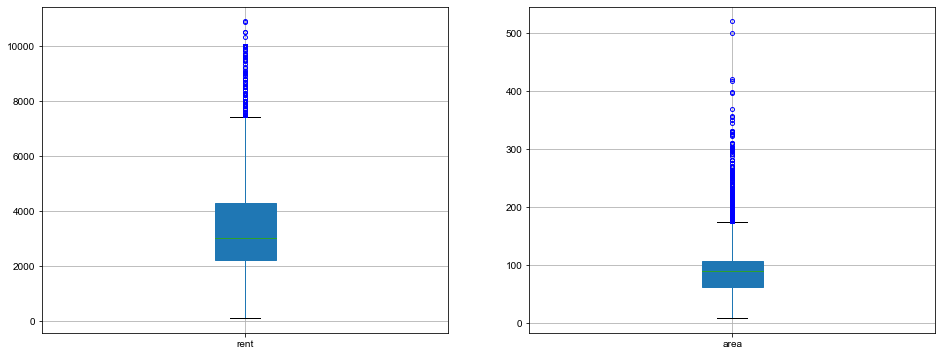

In [17]:
fig,ax= plt.subplots(1,2,figsize=(16,6))
zhuhai_house.boxplot(column=['rent'], flierprops={'markeredgecolor':'blue', 'markersize':4}, patch_artist=True,ax=ax[0])
zhuhai_house.boxplot(column=['area'], flierprops={'markeredgecolor':'blue', 'markersize':4},patch_artist=True, ax=ax[1])
sns.set_style("darkgrid")

In [18]:
print(zhuhai_house['dist'].value_counts())
print(80*'-')
print(zhuhai_house['town'].value_counts())
print(80*'-')
print(zhuhai_house['village'].value_counts())
print(80*'-')
print(zhuhai_house['room'].value_counts())
print(80*'-')
print(zhuhai_house['orientations'].value_counts())

香洲区    10379
斗门区     1818
金湾区     1449
Name: dist, dtype: int64
--------------------------------------------------------------------------------
横琴      1823
唐家湾     1336
白蕉      1278
拱北      1106
吉大      1042
南湾      1006
三灶       650
新香洲      638
前山       529
上冲       506
湾仔       503
航空新城     496
井岸       492
夏湾       406
洪湾       367
兰埔       335
老香洲      335
柠溪       270
红旗       254
南屏       115
平沙        78
翠微        62
南水         8
斗门         6
乾务         5
Name: town, dtype: int64
--------------------------------------------------------------------------------
荔枝湾花园（北区）    165
龙光·玖龙玺       164
荔枝湾花园（南区）    161
华发城建未来荟      155
奥园商业广场       150
            ... 
吉祥园            1
鸟巢美寓           1
柠溪路住宅          1
华海一路           1
邮电东苑           1
Name: village, Length: 1320, dtype: int64
--------------------------------------------------------------------------------
3室2厅2卫    3173
1室1厅1卫    2187
3室2厅1卫    2053
2室2厅1卫    1877
4室2厅2卫    1182
          ... 
4室0厅4卫       1
4室4厅4卫   

In [19]:
zhuhai_house.head()

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
0,香洲区,老香洲,华海路46号,40.00,南,1室1厅1卫,1室,1厅,1卫,10888,整租,/精装/随时看房/,无,免费车位,商水,商电,无
1,香洲区,唐家湾,保利海上五月花2期,38.00,北,1室1厅1卫,1室,1厅,1卫,10860,整租,/精装/随时看房/,有,免费车位,民水,民电,有
2,香洲区,前山,梅花豪庭,33.45,北,1室0厅1卫,1室,0厅,1卫,10500,整租,/,有,免费车位,民水,民电,有
3,香洲区,前山,蔚蓝东岸,47.00,南,1室1厅1卫,1室,1厅,1卫,10500,整租,/精装/,有,免费车位,民水,民电,有
4,香洲区,唐家湾,恒隆华萃园,37.00,南,1室1厅1卫,1室,1厅,1卫,10335,整租,/精装/随时看房/,有,租用车位,商水,商电,有


D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '珠海各区租房占比')

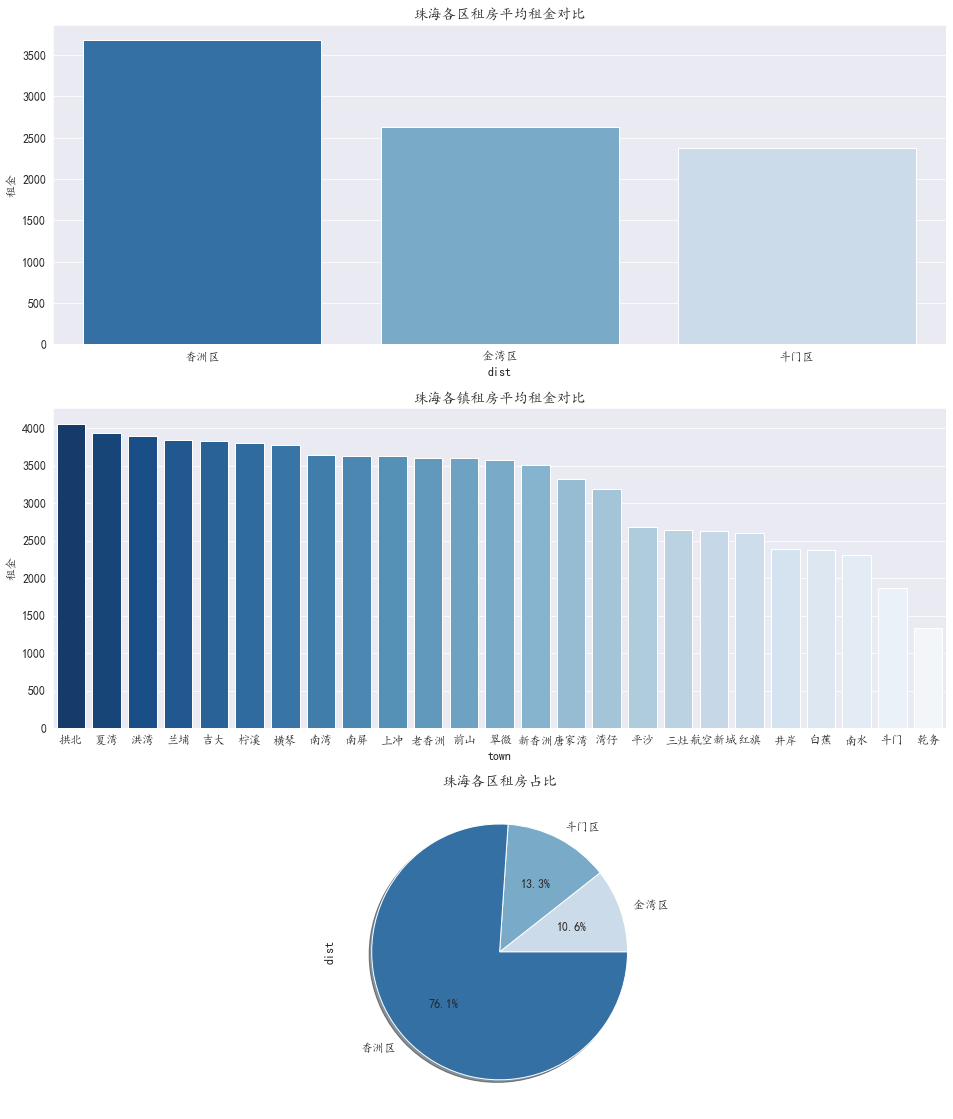

In [21]:
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  
plt.rcParams['font.size'] = 12 
plt.rcParams['axes.unicode_minus'] = False  
fig,ax = plt.subplots(3,1,figsize=(16,20))

y1 = round(zhuhai_house.groupby(by=['dist'])['rent'].mean().sort_values(ascending=False),2)
x1 = y1.index
sns.barplot(x1,y1,ax=ax[0],palette='Blues_r')
ax[0].set_title('珠海各区租房平均租金对比')
ax[0].set_ylabel('租金')


y2 = round(zhuhai_house.groupby(by=['town'])['rent'].mean().sort_values(ascending=False),2)
x2 = y2.index
sns.barplot(x2,y2,ax=ax[1],palette='Blues_r')
ax[1].set_title('珠海各镇租房平均租金对比')
ax[1].set_ylabel('租金')
plt.xticks(rotation=180)

colors = ['#CCDBEA','#79ABC9','#3470A3']
zhuhai_house['dist'].value_counts().sort_values().plot(kind='pie',autopct="%1.1f%%",colors=colors,shadow = True,ax=ax[2])
ax[2].set_title('珠海各区租房占比')

从各镇平均租金来看，各镇差异较大，最高的是拱北(租金超过4000元/月)，最低的是乾务(租金在1200元/月附近)。
从各区平均租金来看，各区差异较大，最高的是香洲区(租金超过4000元/月)。
从占比来看，香洲一枝独秀，占将近一半，因为香洲是中心市区，发展较早且较为成熟。

具体位置来看，
从平均租金来看，各位置差异也十分明显。最高的是拱北口岸，其次是洪湾、夏湾和横琴口岸，最低的是南水、斗门、乾务等。
从平均价格来看，最高的是拱北、夏湾、吉大、横琴等，都是近几年珠海大力发展的地区。最低的是白蕉、南水、斗门、乾务等。


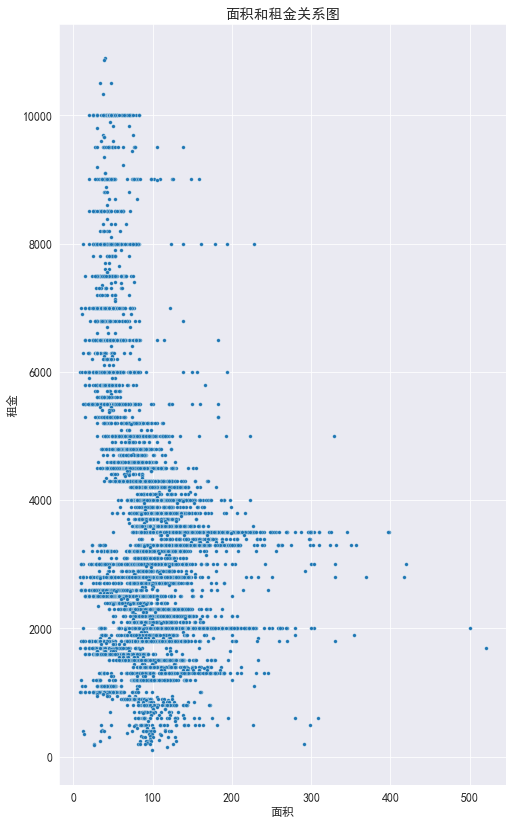

In [22]:
fig = plt.subplots(figsize=(8,14))
sns.scatterplot(x='area',y='rent',data=zhuhai_house,s=14)
plt.title('面积和租金关系图')
plt.xlabel('面积')
plt.ylabel('租金')
sns.set_style("darkgrid",{'font.sans-serif':['simhei','Arial']})

总价基本服从面积越大，价格越高的关系。
单价与面积相关性很小。

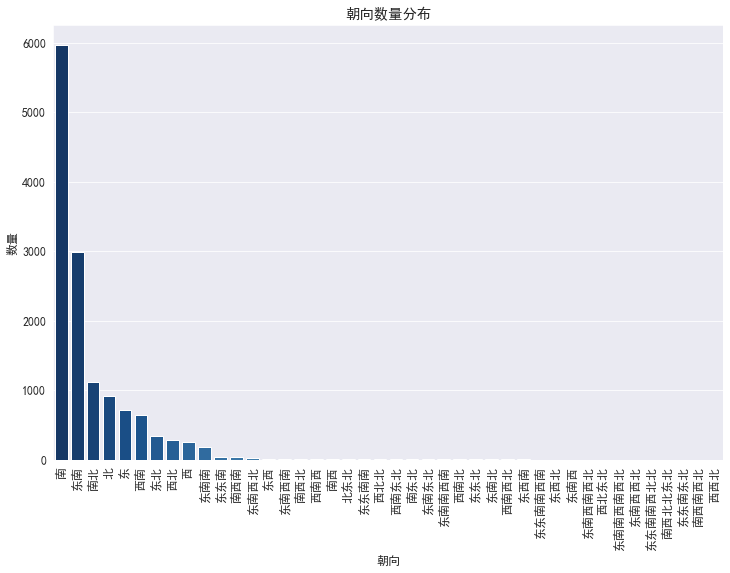

In [23]:
plt.figure(figsize=(12,8))
order = zhuhai_house.groupby(by=["orientations"]).size().sort_values(ascending=False).index
sns.countplot(x=zhuhai_house['orientations'],order=order,palette="Blues_r")
plt.title('朝向数量分布')
plt.xlabel('朝向')
plt.ylabel('数量')
plt.xticks(rotation=90)
sns.set_style("darkgrid",{'font.sans-serif':['simhei','Arial']})

包含南朝向数量占大多数。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '东南西西北'),
  Text(1, 0, '南西北北东北'),
  Text(2, 0, '东南西南西北'),
  Text(3, 0, '东东南南西南'),
  Text(4, 0, '东东北'),
  Text(5, 0, '东西北'),
  Text(6, 0, '西南西'),
  Text(7, 0, '西北北'),
  Text(8, 0, '西'),
  Text(9, 0, '东东南南'),
  Text(10, 0, '北'),
  Text(11, 0, '东'),
  Text(12, 0, '南西南'),
  Text(13, 0, '北东北'),
  Text(14, 0, '东西南'),
  Text(15, 0, '西南东北'),
  Text(16, 0, '西北东北'),
  Text(17, 0, '东南南'),
  Text(18, 0, '南西北'),
  Text(19, 0, '东南'),
  Text(20, 0, '南北'),
  Text(21, 0, '东东南南西北北'),
  Text(22, 0, '南'),
  Text(23, 0, '东南北'),
  Text(24, 0, '西南西北'),
  Text(25, 0, '西南'),
  Text(26, 0, '东南西南'),
  Text(27, 0, '东西'),
  Text(28, 0, '西北'),
  Text(29, 0, '西南北'),
  Text(30, 0, '东北'),
  Text(31, 0, '东南南西南西北'),
  Text(32, 0, '东南西北'),
  Text(33, 0, '南东北'),
  Text(34, 0, '南西'),
  Text(35, 0, '东南西'),
  Text(36, 0, 

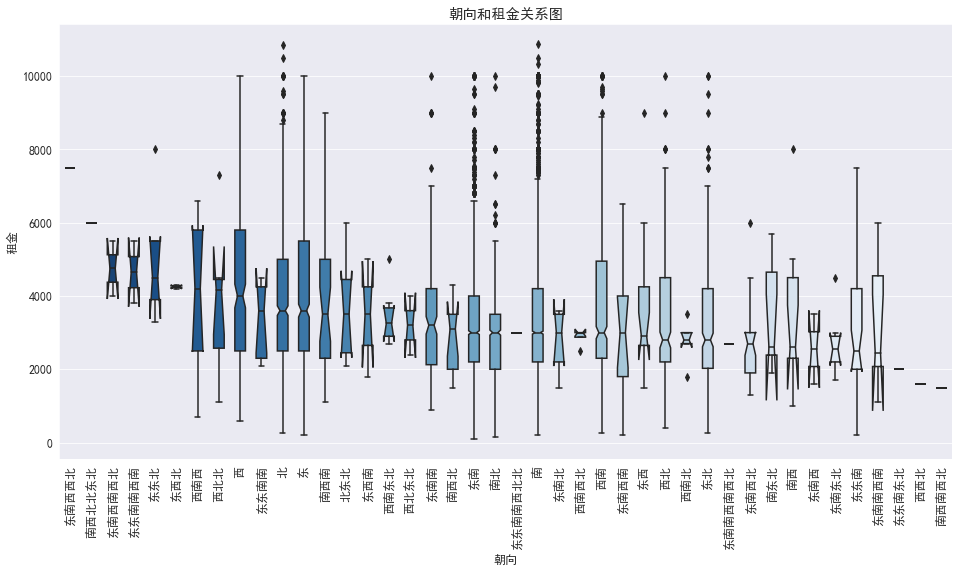

In [24]:
plt.figure(figsize=(16,8))
my_order = zhuhai_house.groupby(by=["orientations"])["rent"].median().sort_values(ascending=False).index
sns.boxplot(x='orientations',y='rent',data=zhuhai_house,width=0.5,notch=True,order=my_order,palette="Blues_r")
plt.title('朝向和租金关系图')
plt.xlabel('朝向')
plt.ylabel('租金')
plt.xticks(rotation=90)

朝南的单价竟然比朝北的单价要低，与认知不符，需进一步探究。初步怀疑是不同县区朝向数量分布存在差异，具体分区探究朝向和单价的关系。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '西南东北'),
  Text(1, 0, '南西南'),
  Text(2, 0, '南西北'),
  Text(3, 0, '东南南'),
  Text(4, 0, '西南西北'),
  Text(5, 0, '东东南南西北北'),
  Text(6, 0, '东北'),
  Text(7, 0, '东南'),
  Text(8, 0, '东南东北'),
  Text(9, 0, '东南北'),
  Text(10, 0, '东南西南'),
  Text(11, 0, '北'),
  Text(12, 0, '南'),
  Text(13, 0, '南北'),
  Text(14, 0, '西'),
  Text(15, 0, '西南'),
  Text(16, 0, '东'),
  Text(17, 0, '东南西北'),
  Text(18, 0, '南西'),
  Text(19, 0, '西北'),
  Text(20, 0, '东东南'),
  Text(21, 0, '南东北')])

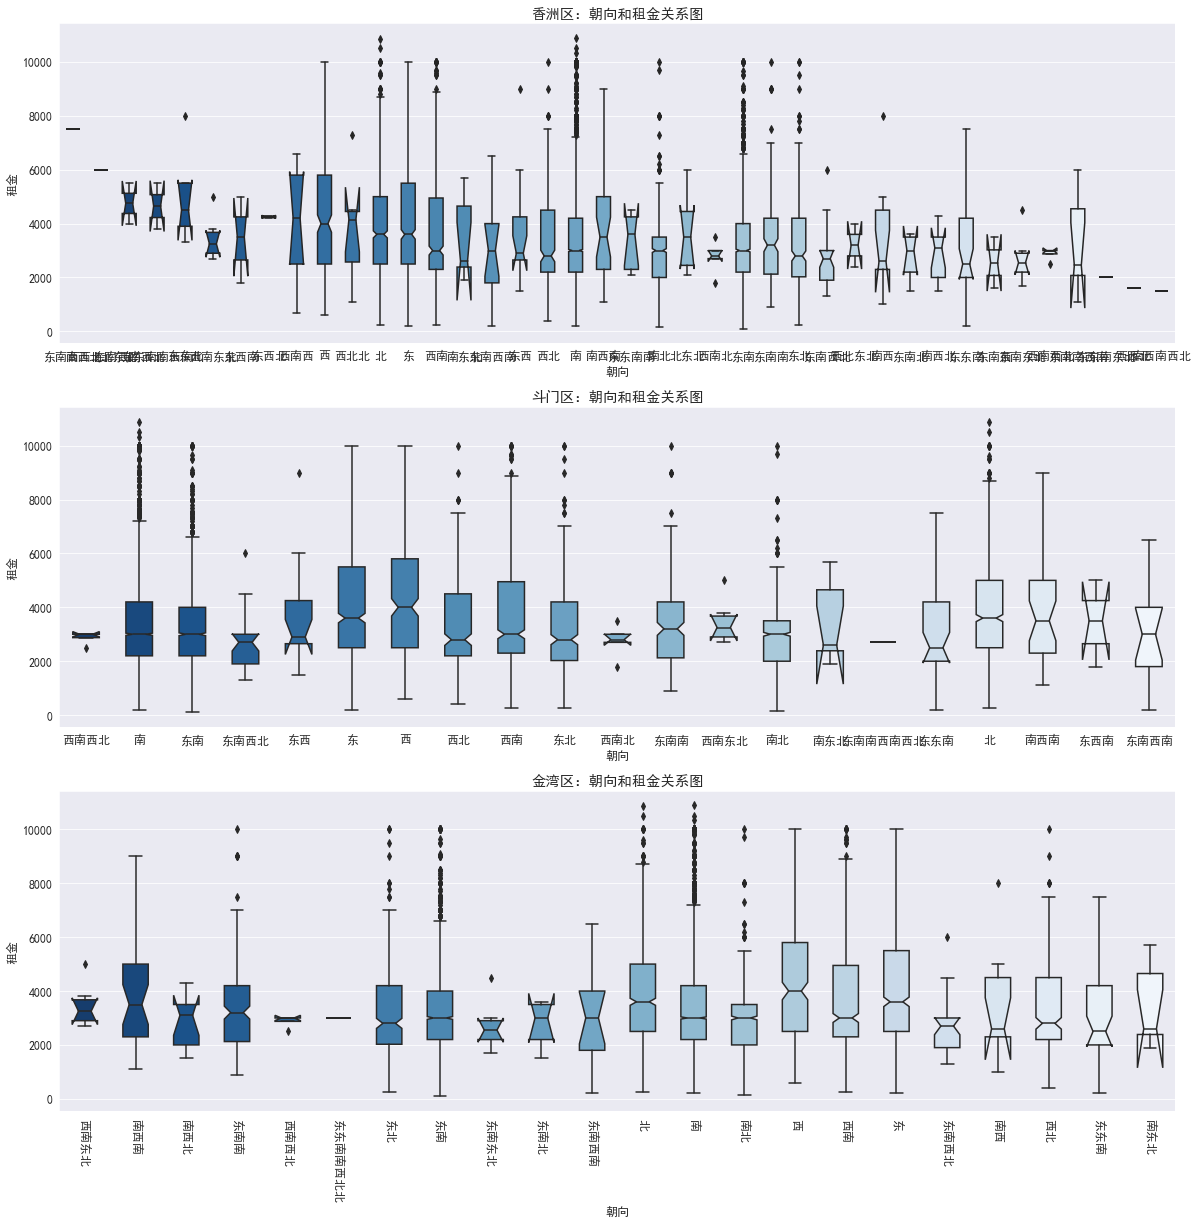

In [25]:
fig,ax = plt.subplots(3,1,figsize=(20,20))
my_order = zhuhai_house[zhuhai_house.dist=='香洲区'].groupby(by=["orientations"])["rent"].median().sort_values(ascending=False).index
sns.boxplot(x='orientations',y='rent',ax=ax[0],data=zhuhai_house,width=0.5,notch=True,order=my_order,palette="Blues_r")
ax[0].set_title('香洲区：朝向和租金关系图')
ax[0].set_xlabel('朝向')
ax[0].set_ylabel('租金')
plt.xticks(rotation=270)

my_order = zhuhai_house[zhuhai_house.dist=='斗门区'].groupby(by=["orientations"])["rent"].median().sort_values(ascending=False).index
sns.boxplot(x='orientations',y='rent',ax=ax[1],data=zhuhai_house,width=0.5,notch=True,order=my_order,palette="Blues_r")
ax[1].set_title('斗门区：朝向和租金关系图')
ax[1].set_xlabel('朝向')
ax[1].set_ylabel('租金')
plt.xticks(rotation=270)

my_order = zhuhai_house[zhuhai_house.dist=='金湾区'].groupby(by=["orientations"])["rent"].median().sort_values(ascending=False).index
sns.boxplot(x='orientations',y='rent',ax=ax[2],data=zhuhai_house,width=0.5,notch=True,order=my_order,palette="Blues_r")
ax[2].set_title('金湾区：朝向和租金关系图')
ax[2].set_xlabel('朝向')
ax[2].set_ylabel('租金')
plt.xticks(rotation=270)

按各区来看，包含北朝向方位的价格相对来说要贵一点，而南朝向方位的价格要便宜一点。
人们在挑选房子时，经常喜欢挑坐北朝南的房子，因为这种房子采光好，顺光顺水，冬暖夏凉，很适合人居住。

Text(0, 0.5, '户型')

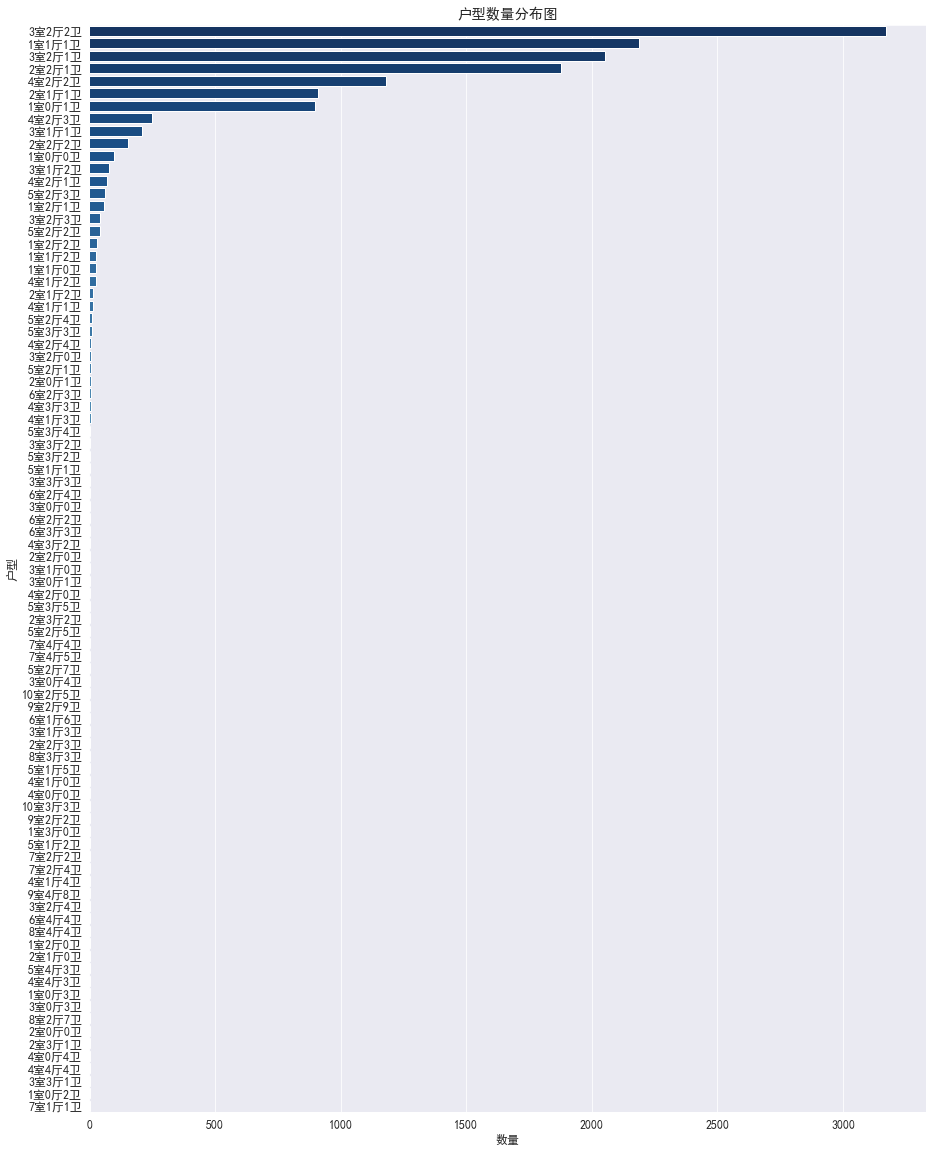

In [26]:
plt.figure(figsize=(15,20))
order = zhuhai_house['room'].value_counts(ascending=False).index
sns.countplot(y=zhuhai_house['room'],order=order,palette="Blues_r")
plt.title('户型数量分布图')
plt.xlabel('数量')
plt.ylabel('户型')

Text(0, 0.5, '数量')

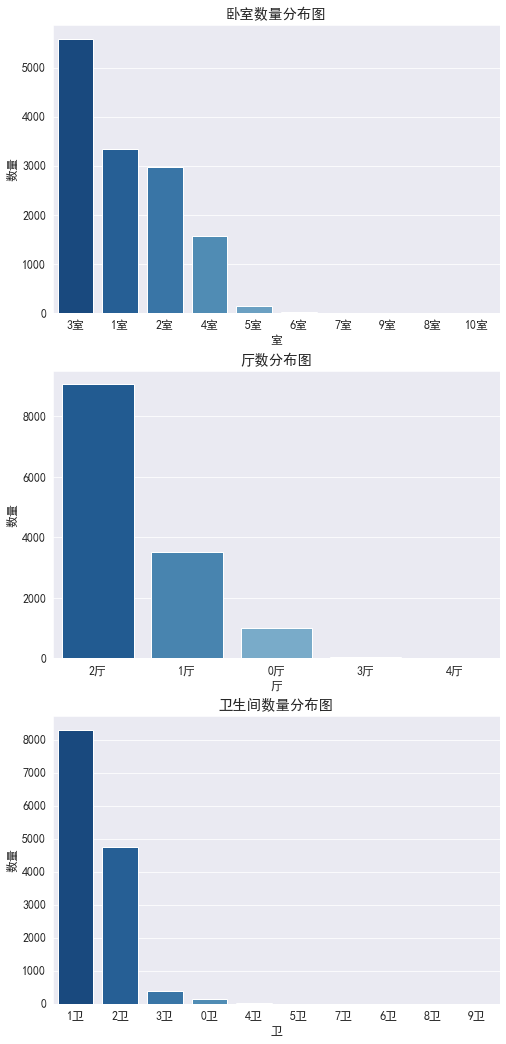

In [27]:
fig,ax = plt.subplots(3,1,figsize=(8,18))
order = zhuhai_house['bedroom'].value_counts(ascending=False).index
sns.countplot(x=zhuhai_house['bedroom'],ax=ax[0],order=order,palette="Blues_r")
ax[0].set_title('卧室数量分布图')
ax[0].set_xlabel('室')
ax[0].set_ylabel('数量')

order = zhuhai_house['living_room'].value_counts(ascending=False).index
sns.countplot(x=zhuhai_house['living_room'],ax=ax[1],order=order,palette="Blues_r")
ax[1].set_title('厅数分布图')
ax[1].set_xlabel('厅')
ax[1].set_ylabel('数量')

order = zhuhai_house['washing_room'].value_counts(ascending=False).index
sns.countplot(x=zhuhai_house['washing_room'],ax=ax[2],order=order,palette="Blues_r")
ax[2].set_title('卫生间数量分布图')
ax[2].set_xlabel('卫')
ax[2].set_ylabel('数量')

D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '租金')

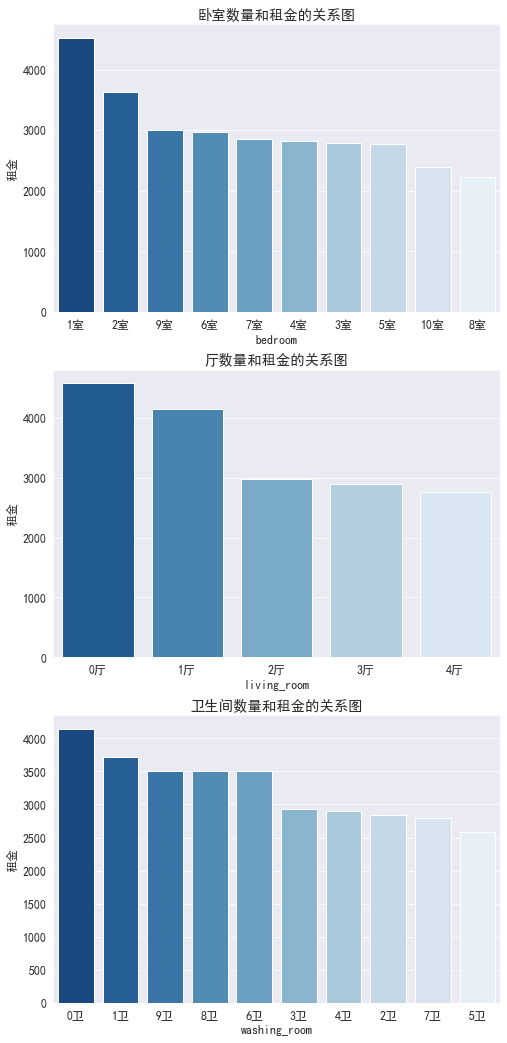

In [28]:
fig,ax = plt.subplots(3,1,figsize=(8,18))

y1 = round(zhuhai_house.groupby(by=['bedroom'])['rent'].mean().sort_values(ascending=False),2)
x1 = y1.index
sns.barplot(x1,y1,ax=ax[0],order=x1,palette="Blues_r")
ax[0].set_title('卧室数量和租金的关系图')
ax[0].set_ylabel('租金')

y2 = round(zhuhai_house.groupby(by=['living_room'])['rent'].mean().sort_values(ascending=False),2)
x2 = y2.index
sns.barplot(x2,y2,ax=ax[1],order=x2,palette="Blues_r")
ax[1].set_title('厅数量和租金的关系图')
ax[1].set_ylabel('租金')

y3 = round(zhuhai_house.groupby(by=['washing_room'])['rent'].mean().sort_values(ascending=False),2)
x3 = y3.index
sns.barplot(x3,y3,ax=ax[2],order=x3,palette="Blues_r")
ax[2].set_title('卫生间数量和租金的关系图')
ax[2].set_ylabel('租金')

Text(0.5, 0, '珠海市市辖区')

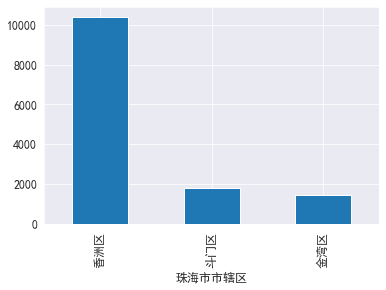

In [29]:
zhuhai_house.dist.value_counts().plot(kind = 'bar')
plt.xlabel("珠海市市辖区")

Text(0.5, 1.0, '珠海市各辖区拥有短租房占比')

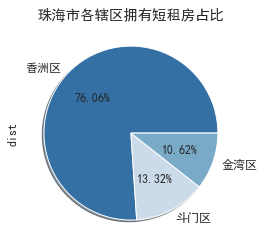

In [30]:
colors = ['#3470A3','#CCDBEA','#79ABC9']
zhuhai_house.dist.value_counts().plot(kind = 'pie',autopct = '%.2f%%',colors=colors,shadow = True)
plt.title("珠海市各辖区拥有短租房占比")

In [31]:
zhuhai_house.rent.mean()
zhuhai_house.rent.median()
zhuhai_house.rent.std()
zhuhai_house.rent.skew()
zhuhai_house.rent.agg(['mean','median','sum','std','skew'])

mean      3.397098e+03
median    3.000000e+03
sum       4.635680e+07
std       1.694275e+03
skew      1.142804e+00
Name: rent, dtype: float64

Text(0.5, 1.0, '租金频数图')

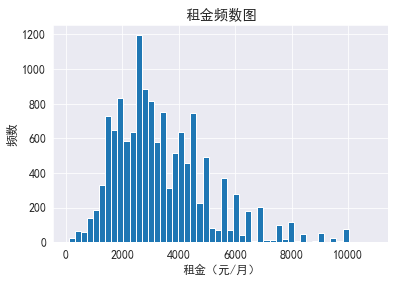

In [32]:
zhuhai_house.rent.hist(bins=50)
plt.xlabel("租金（元/月）")
plt.ylabel("频数")
plt.title("租金频数图")

In [33]:
zhuhai_Sch = pd.crosstab(zhuhai_house.dist,zhuhai_house.elevator)
zhuhai_Sch

elevator,无,有
dist,,
斗门区,658,1160
金湾区,486,963
香洲区,2242,8137


Text(0, 0.5, '电梯数量')

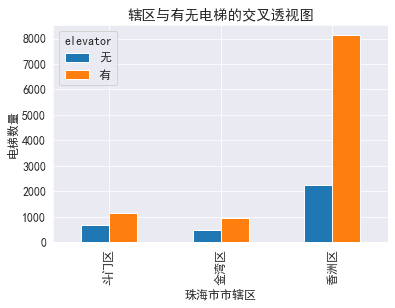

In [34]:
pd.crosstab(zhuhai_house.dist,zhuhai_house.elevator).plot(kind="bar")
plt.title("辖区与有无电梯的关系图")
plt.xlabel("珠海市市辖区")
plt.ylabel("电梯数量")

Text(0, 0.5, '珠海市市辖区')

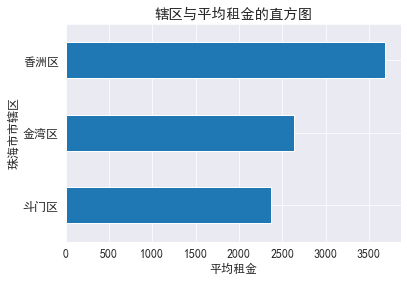

In [35]:
zhuhai_house.rent.groupby(zhuhai_house.dist).mean().sort_values(ascending= True).plot(kind = 'barh') 
plt.title("辖区与平均租金的柱状图")
plt.xlabel("平均租金")
plt.ylabel("珠海市市辖区")

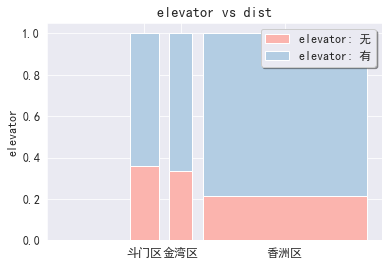

In [36]:
from stack2dim import *
stack2dim(zhuhai_house,i="dist",j="elevator") 

Text(0, 0.5, '平均租金')

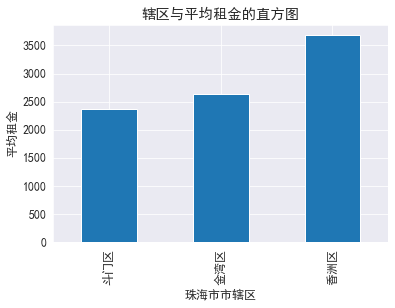

In [37]:
zhuhai_house.rent.groupby(zhuhai_house.dist).mean().plot(kind="bar")
plt.title("辖区与平均租金的柱状图")
plt.xlabel("珠海市市辖区")
plt.ylabel("平均租金")

Text(0.5, 1.0, '珠海市市辖区对租金的分组箱线图')

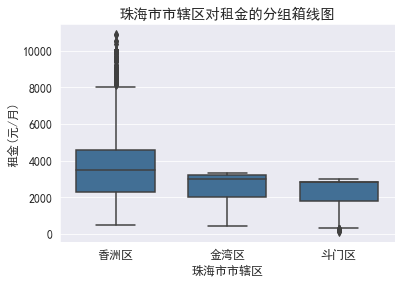

In [38]:
sns.boxplot(x='dist', y='rent', data = zhuhai_house,width=0.7,color='#3470A3')
plt.ylabel("租金(元/月)")
plt.xlabel("珠海市市辖区")
plt.title("珠海市市辖区对租金的分组箱线图")

Text(0.5, 1.0, '卧室数对租金影响的直方图')

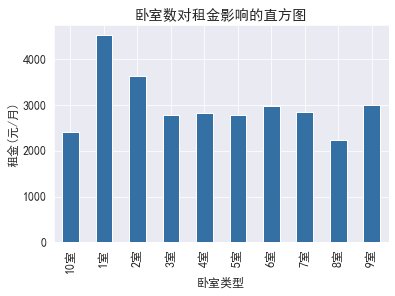

In [39]:
zhuhai_house1=zhuhai_house[['bedroom','rent']]
zhuhai_house1.rent.groupby(zhuhai_house1.bedroom).mean().plot(kind='bar',color="#3470A3")
plt.ylabel("租金(元/月)")
plt.xlabel("卧室类型")
plt.title("卧室数对租金影响的柱状图")

Text(0.5, 0, '卧室')

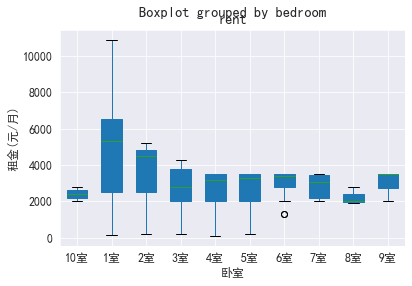

In [40]:
zhuhai_house1.boxplot(by='bedroom',patch_artist=True,widths=0.6)
plt.ylabel("租金(元/月)")
plt.xlabel("卧室")

In [41]:
zhuhai_all= pd.DataFrame({'区域':zhuhai_house['dist'].unique(), 
                      '房租总金额':[0]*3, 
                      '房屋总面积(㎡)':[0]*3})
zhuhai_all

,区域,房租总金额,房屋总面积(㎡)
0,香洲区,0,0
1,金湾区,0,0
2,斗门区,0,0


In [42]:
sum_rent = zhuhai_house['rent'].groupby(zhuhai_house['dist']).sum() 
sum_area = zhuhai_house['area'].groupby(zhuhai_house['dist']).sum() 
zhuhai_all['房租总金额'] = sum_rent.values 
zhuhai_all['房屋总面积(㎡)'] = sum_area.values
zhuhai_all

,区域,房租总金额,房屋总面积(㎡)
0,香洲区,4309534,174428.64
1,金湾区,3814332,139488.69
2,斗门区,38232932,905423.90


In [43]:
zhuhai_all['每平米租金(元)'] = round(zhuhai_all['房租总金额']/zhuhai_all['房屋总面积(㎡)'],2)
zhuhai_all

,区域,房租总金额,房屋总面积(㎡),每平米租金(元)
0,香洲区,4309534,174428.64,24.71
1,金湾区,3814332,139488.69,27.35
2,斗门区,38232932,905423.90,42.23


In [44]:
groupy_area = zhuhai_house.groupby(by = 'dist').count()
groupy_area = groupy_area.reset_index()
new_zhuhai = groupy_area[['dist','village']]
new_zhuhai.columns = ['区域','数量']
new_zhuhai

,区域,数量
0,斗门区,1818
1,金湾区,1449
2,香洲区,10379


In [45]:
new_zhuhai.sort_values(by=['数量'],ascending=False)

,区域,数量
2,香洲区,10379
0,斗门区,1818
1,金湾区,1449


In [46]:
zhuhai_merge = pd.merge(new_zhuhai,zhuhai_all)
zhuhai_merge

,区域,数量,房租总金额,房屋总面积(㎡),每平米租金(元)
0,斗门区,1818,38232932,905423.90,42.23
1,金湾区,1449,3814332,139488.69,27.35
2,香洲区,10379,4309534,174428.64,24.71


<Figure size 600x800 with 0 Axes>

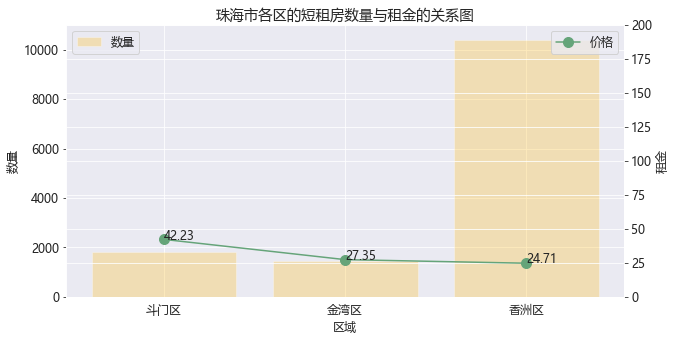

In [47]:
import matplotlib.pyplot as plt 
import numpy as np

plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
 
#数据
num = zhuhai_merge['数量']
price = zhuhai_merge['每平米租金(元)']
dist = zhuhai_merge['区域']
a=[i for i in range(3)]

#准备画布
plt.figure(figsize=(6,8),dpi = 100)

#画图
fig, ax1 = plt.subplots(figsize = (10, 5), facecolor='white')

# 左轴
ax1.bar(dist, num, color='#FFC125', alpha=0.3,label = "数量")
ax1.set_xlabel('区域') 
ax1.set_ylabel('数量') 
ax1.set_ylim(0, 11000)
plt.legend(loc="upper left")

# 右轴
ax2 = ax1.twinx() 
ax2.plot(dist, price, color='#65a479', marker='o', markersize=10,label = "价格") 
ax2.set_ylabel('租金') 
ax2.set_ylim(0, 200)
for i,(_x,_y) in enumerate(zip(a,price)):
    plt.text(_x,_y,price[i])
plt.legend(loc="upper right")
plt.title("珠海市各区的短租房数量与租金的关系图")
plt.show()

In [48]:
pd.concat([(zhuhai_house[zhuhai_house.rent==min(zhuhai_house.rent)]),(zhuhai_house[zhuhai_house.rent==max(zhuhai_house.rent)])])

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
13972,斗门区,白蕉,中邦御珑湾,99.0,东南,4室2厅2卫,4室,2厅,2卫,100,整租,/新上/精装/双卫生间/,有,免费车位,民水,民电,有
0,香洲区,老香洲,华海路46号,40.0,南,1室1厅1卫,1室,1厅,1卫,10888,整租,/精装/随时看房/,无,免费车位,商水,商电,无


Text(0.5, 1.0, '城区对租金的散点图')

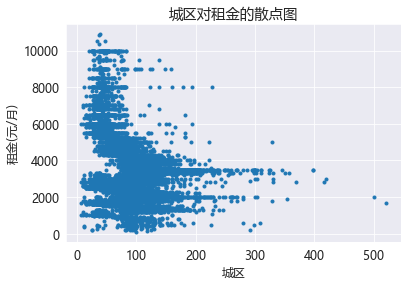

In [49]:
zhuhai_houseA=zhuhai_house[['area','rent']]
plt.scatter(zhuhai_houseA.area,zhuhai_houseA.rent,marker='.')
data1=np.array(zhuhai_houseA['rent'])
data2=np.array(zhuhai_houseA['area'])
zhuhai_houseB=np.array([data1,data2])
corrcoef(zhuhai_houseB)
plt.ylabel("租金(元/月)")
plt.xlabel("城区")
plt.title("城区对租金的散点图")

<ipython-input-50-d3b5d57e1de3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zhuhai_houseA['rent_ln'] = np.log(zhuhai_houseA['rent'])  #对price取对数


Text(0.5, 1.0, '面积对租金的散点图')

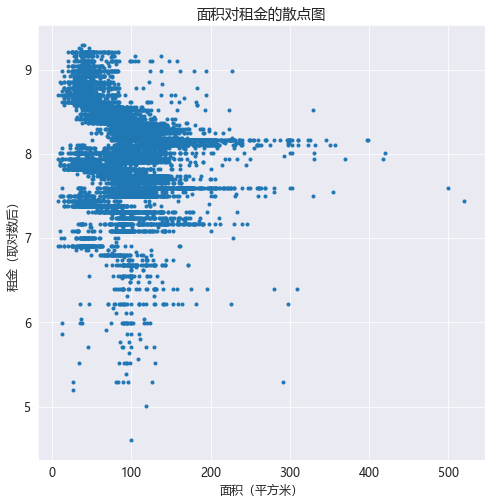

In [50]:
zhuhai_houseA['rent_ln'] = np.log(zhuhai_houseA['rent'])  #对price取对数
plt.figure(figsize=(8,8))
plt.scatter(zhuhai_houseA.area,zhuhai_houseA.rent_ln,marker='.')
plt.ylabel("租金（取对数后）")
plt.xlabel("面积（平方米）")
plt.title("面积对租金的散点图")

In [51]:
data1=array(zhuhai_houseA['rent_ln'])
data2=array(zhuhai_houseA['area'])
zhuhai_houseB=array([data1,data2])
corrcoef(zhuhai_houseB)

array([[ 1.        , -0.19718386],
       [-0.19718386,  1.        ]])

<ipython-input-52-844b66a6c26b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zhuhai_houseA['rent_ln'] = np.log(zhuhai_houseA['rent'])
<ipython-input-52-844b66a6c26b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zhuhai_houseA['area_ln'] = np.log(zhuhai_houseA['area'])


Text(0.5, 1.0, '面积对租金的散点图')

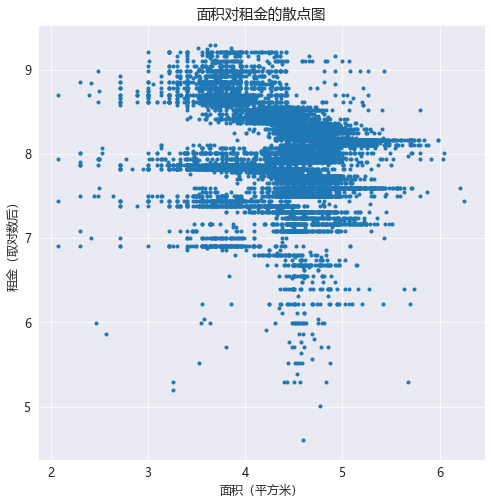

In [52]:
zhuhai_houseA['rent_ln'] = np.log(zhuhai_houseA['rent'])  
zhuhai_houseA['area_ln'] = np.log(zhuhai_houseA['area'])  
plt.figure(figsize=(8,8))
plt.scatter(zhuhai_houseA.area_ln,zhuhai_houseA.rent_ln,marker='.')
plt.ylabel("租金（取对数后）")
plt.xlabel("面积（平方米）")
plt.title("面积对租金的散点图")

In [53]:
zhuhai_house = zhuhai_house.sample(frac=1)
zhuhai_house

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
3108,香洲区,唐家湾,格力海岸,95.00,南,2室2厅1卫,2室,2厅,1卫,4500,整租,/新上/精装/,有,租用车位,民水,民电,有
6013,香洲区,唐家湾,万科翡翠中央.翡玲苑,109.00,南,4室2厅2卫,4室,2厅,2卫,3500,整租,/精装/双卫生间/随时看房/,无,免费车位,商水,商电,无
1492,香洲区,吉大,君怡花园,20.00,南,1室1厅1卫,1室,1厅,1卫,5500,整租,/精装/随时看房/,无,免费车位,民水,民电,有
771,香洲区,兰埔,格力香樟,45.59,东南,1室1厅1卫,1室,1厅,1卫,6500,整租,/精装/,有,租用车位,民水,民电,有
5257,香洲区,夏湾,南湾花园二期,112.00,东,3室2厅1卫,3室,2厅,1卫,3600,整租,/随时看房/,有,免费车位,民水,民电,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,香洲区,拱北,正邦岭秀城公寓楼,37.00,南,1室0厅1卫,1室,0厅,1卫,6000,整租,/新上/随时看房/,有,租用车位,民水,民电,有
13007,香洲区,唐家湾,保利海上五月花,109.00,东南,3室2厅2卫,3室,2厅,2卫,1500,整租,/精装/双卫生间/随时看房/,有,租用车位,民水,民电,有
356,香洲区,拱北,正邦岭秀城公寓楼,39.00,东,1室0厅1卫,1室,0厅,1卫,8000,整租,/精装/随时看房/,有,租用车位,民水,民电,有
7758,斗门区,白蕉,海逸假期花园,85.01,东南南,2室2厅1卫,2室,2厅,1卫,2800,整租,/,有,租用车位,商水,商电,无


In [54]:
zhuhai_house = zhuhai_house.iloc[0:3000][:]
zhuhai_house

,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
3108,香洲区,唐家湾,格力海岸,95.00,南,2室2厅1卫,2室,2厅,1卫,4500,整租,/新上/精装/,有,租用车位,民水,民电,有
6013,香洲区,唐家湾,万科翡翠中央.翡玲苑,109.00,南,4室2厅2卫,4室,2厅,2卫,3500,整租,/精装/双卫生间/随时看房/,无,免费车位,商水,商电,无
1492,香洲区,吉大,君怡花园,20.00,南,1室1厅1卫,1室,1厅,1卫,5500,整租,/精装/随时看房/,无,免费车位,民水,民电,有
771,香洲区,兰埔,格力香樟,45.59,东南,1室1厅1卫,1室,1厅,1卫,6500,整租,/精装/,有,租用车位,民水,民电,有
5257,香洲区,夏湾,南湾花园二期,112.00,东,3室2厅1卫,3室,2厅,1卫,3600,整租,/随时看房/,有,免费车位,民水,民电,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,斗门区,白蕉,忠信桃源居,141.00,东南,4室2厅2卫,4室,2厅,2卫,1200,整租,/精装/双卫生间/随时看房/,有,租用车位,商水,商电,无
3200,香洲区,夏湾,南苑,73.00,南,2室2厅1卫,2室,2厅,1卫,4500,整租,/精装/,无,租用车位,民水,民电,无
1497,香洲区,上冲,奥园商业广场,38.00,东,1室1厅1卫,1室,1厅,1卫,5500,整租,/精装/非居住房屋/,有,租用车位,商水,商电,有
10223,香洲区,拱北,中铁诺德国际,113.00,南,3室2厅2卫,3室,2厅,2卫,2300,整租,/精装/双卫生间/随时看房/,有,免费车位,民水,民电,有


D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3374.12 and sigma = 1669.67



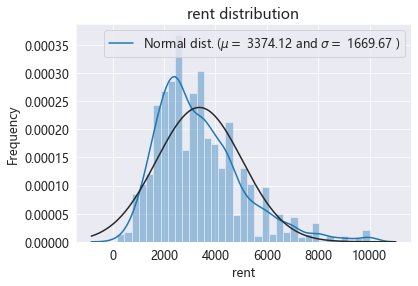

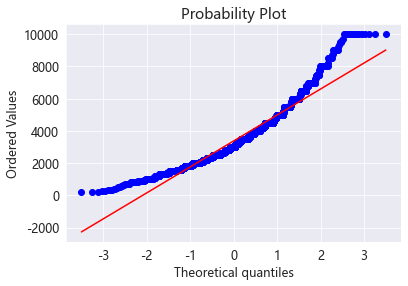

In [70]:
from scipy.stats import norm
sns.distplot(zhuhai_house['rent'],fit=norm)
#均值和方差
(mu,sigma) = norm.fit(zhuhai_house['rent'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('rent distribution')

fig =plt.figure()
res = stats.probplot(zhuhai_house['rent'], plot=plt)
plt.show()

D:\BigData\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 8.00 and sigma = 0.51



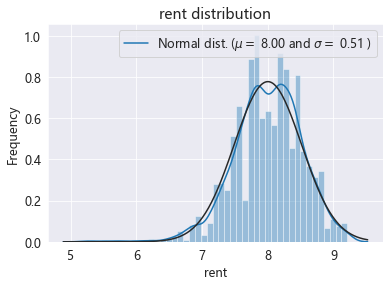

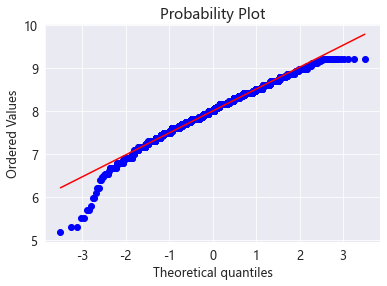

In [71]:
#用对数化解决偏态 log(1+x)
zhuhai_house['rent'] = np.log1p(zhuhai_house['rent'])
sns.distplot(zhuhai_house['rent'],fit=norm)
(mu, sigma) = norm.fit(zhuhai_house['rent'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('rent distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(zhuhai_house['rent'], plot=plt)
plt.show()

In [56]:
se =zhuhai_house.rent.std() / len(zhuhai_house) ** 0.5 
LB = zhuhai_house.rent.mean() - 1.98 * se 
UB = zhuhai_house.rent.mean() + 1.98 * se 
(LB, UB)

(3313.7511233894734, 3434.4875432771937)

In [57]:
zhuhai_house['rent'].groupby(zhuhai_house['parking']).describe()

,count,mean,std,min,25%,50%,75%,max
parking,,,,,,,,
免费车位,1616.0,2984.629332,1500.615840,180.0,2000.0,2800.0,3600.0,10000.0
租用车位,1384.0,3828.899566,1741.685994,500.0,2500.0,3600.0,4800.0,10000.0


In [58]:
zhuhai_house['rent'].groupby(zhuhai_house['dist']).describe()

,count,mean,std,min,25%,50%,75%,max
dist,,,,,,,,
斗门区,369.0,2359.371274,655.019117,180.0,1800.0,2800.0,2800.0,3000.0
金湾区,302.0,2624.139073,698.399038,400.0,2000.0,3000.0,3200.0,3300.0
香洲区,2329.0,3632.142550,1777.318458,500.0,2300.0,3500.0,4500.0,10000.0


In [59]:
zhuhai_house['rent'].groupby(zhuhai_house['electricity']).describe()

,count,mean,std,min,25%,50%,75%,max
electricity,,,,,,,,
商电,1002.0,3363.58982,1767.364404,180.0,2100.0,3000.0,4000.0,10000.0
民电,1998.0,3379.39990,1619.323914,200.0,2200.0,3200.0,4300.0,10000.0


In [60]:
pd.set_option('display.max_columns', None) 
zhuhai_house.groupby('rent')[['parking']].describe().T

rent           180   200   250   300   330   400   450   500   600   650    \
parking count      1     2     2     2     1     2     1     3     2     2   
        unique     1     1     1     1     1     1     1     2     1     1   
        top     免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  租用车位  租用车位   
        freq       1     2     2     2     1     2     1     2     2     2   

rent           680   700   750   800   850   880   900   950   980   1000   \
parking count      1     6     1    14     1     1    17     3     2    32   
        unique     1     2     1     2     1     1     2     1     1     2   
        top     免费车位  租用车位  租用车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位   
        freq       1     4     1    10     1     1    12     3     2    24   

rent           1050  1100  1189  1199  1200  1300  1350  1400  1450  1480   \
parking count      1     9     1     1    23    52     3    20     3     1   
        unique     1     2     1     1     2     2     2     2     2     1   
        top     免费车位  免费车位  免费车位  租用车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位   
        freq       1     7     1     1    17    45     2    14     2     1   

rent           1500  1550  1600  1650  1680  1700  1750  1800  1850  1900   \
parking count     73     2    59     4     2    38     1    98     3    30   
        unique     2     1     2     2     1     2     1     2     1     2   
        top     免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位   
        freq      51     2    40     3     2    24     1    77     3    24   

rent           1950  1990  2000  2088  2100  2150  2200  2250  2300  2380   \
parking count      2     1   140     1    51     2    98     1   101     1   
        unique     1     1     2     1     2     2     2     1     2     1   
        top     免费车位  免费车位  免费车位  租用车位  免费车位  免费车位  免费车位  免费车位  免费车位  免费车位   
        freq       2     1    97     1    32     1    50     1    64     1   

rent           2400  2450  2500  2550  2600  2650  2680  2700  2800  2850   \
parking count     37     1   183     2    83     2     1    38   118     2   
        unique     2     1     2     2     2     1     1     2     2     1   
        top     免费车位  免费车位  免费车位  免费车位  租用车位  租用车位  租用车位  租用车位  免费车位  免费车位   
        freq      22     1    97     1    67     2     1    21    69     2   

rent           2900  2980  3000  3050  3100  3200  3300  3350  3400  3450   \
parking count     17     1   135     1    16    71    61     1    19     1   
        unique     2     1     2     1     2     2     2     1     2     1   
        top     免费车位  免费车位  免费车位  租用车位  免费车位  免费车位  免费车位  免费车位  免费车位  租用车位   
        freq      13     1    88     1     8    62    38     1    11     1   

rent           3500  3550  3600  3650  3680  3700  3750  3800  3900  3950   \
parking count    174     1    50     1     1    17     1    85    18     1   
        unique     2     1     2     1     1     2     1     2     2     1   
        top     免费车位  租用车位  免费车位  租用车位  免费车位  免费车位  租用车位  免费车位  免费车位  租用车位   
        freq     115     1    33     1     1    11     1    55    12     1   

rent           4000  4100  4120  4200  4300  4400  4500  4600  4700  4800   \
parking count    120     8     1    64    46     3   163    14     4    33   
        unique     2     2     1     2     2     1     2     1     2     1   
        top     免费车位  租用车位  租用车位  租用车位  租用车位  租用车位  租用车位  租用车位  免费车位  租用车位   
        freq      72     5     1    43    31     3   129    14     2    33   

rent           4900  5000  5100  5200  5300  5380  5500  5600  5700  5800   \
parking count      3    98     1    12     7     1    79     7     2    10   
        unique     2     2     1     2     2     1     2     2     2     1   
        top     租用车位  租用车位  租用车位  租用车位  租用车位  免费车位  租用车位  租用车位  免费车位  租用车位   
        freq       2    70     1    10     5     1    47     4     1    10   

rent           6000  6100  6200  6250  6300  6500  6600  6800  6900  7000   \
parking coun

In [61]:
sm.stats.anova_lm(ols('rent ~ C(parking)',data=zhuhai_house).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(parking),1.0,5.313971e+08,5.313971e+08,203.412105,1.055458e-44
Residual,2998.0,7.832024e+09,2.612416e+06,NaN,NaN


我们可以看到因子（parking）的不同水平，对于因变量的影响还是很显著的，p值显然小于0.05

In [62]:
sm.stats.anova_lm(ols('rent ~ C(dist)',data=zhuhai_house).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(dist),2.0,7.048858e+08,3.524429e+08,137.920826,5.011656e-58
Residual,2997.0,7.658535e+09,2.555400e+06,NaN,NaN


In [63]:
sm.stats.anova_lm(ols('rent ~ C(water)',data=zhuhai_house).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(water),1.0,3.157289e+06,3.157289e+06,1.132207,0.287391
Residual,2998.0,8.360263e+09,2.788614e+06,NaN,NaN


In [64]:
sm.stats.anova_lm(ols('rent ~ C(gas)',data=zhuhai_house).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(gas),1.0,1.087054e+08,1.087054e+08,39.480324,3.794000e-10
Residual,2998.0,8.254715e+09,2.753407e+06,NaN,NaN


In [65]:
sm.stats.anova_lm(ols('rent ~ C(electricity)',data=zhuhai_house).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(electricity),1.0,1.668054e+05,1.668054e+05,0.059795,0.806837
Residual,2998.0,8.363254e+09,2.789611e+06,NaN,NaN


In [66]:
sm.stats.anova_lm(ols('rent ~ C(elevator)',data=zhuhai_house).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(elevator),1.0,2.201192e+07,2.201192e+07,7.911342,0.004945
Residual,2998.0,8.341409e+09,2.782324e+06,NaN,NaN


In [67]:
cor = zhuhai_house.corr() 
cor

,area,rent
area,1.000000,-0.263834
rent,-0.263834,1.000000


Text(0.5, 1.0, '租金与面积的相关性')

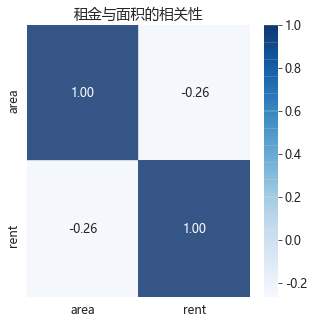

In [68]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues,fmt='.2f', alpha=0.8)
plt.title("租金与面积的相关性")

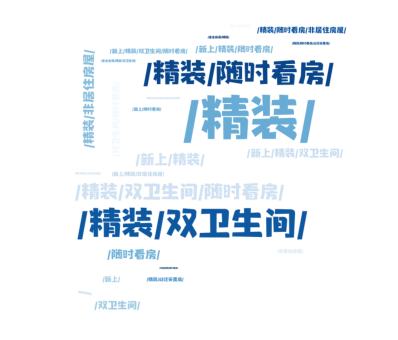

In [69]:
import collections
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

str1 = [data for data in zhuhai_house['label']]

word_count = pd.Series(str1).value_counts() 

plt.figure(figsize=(10,6))
Marquez_mask = np.array(Image.open('Data/R-C.png'))
wordcloud = WordCloud(font_path='Data/WenYue-JuJiuWuTi-J-2.otf',
                      mask=Marquez_mask,
                      max_words=2000,
                      background_color="white",
                      colormap='Blues',
                      margin=20).fit_words(word_count)
plt.imshow(wordcloud)
plt.axis("off") 
# 显示
plt.show()

In [74]:
# import pandas as pd
# sample = zhuhai_house.sample(frac=1, random_state=5, axis=0)
# sample.to_excel(r'D:\BigData\Python\202026118_林文健_珠海市出租房租金的影响分析\zhuhai_kfjy.xlsx',encoding='utf_8_sig')
# zhuhaihouse2= pd.read_excel(r'D:\BigData\Python\202026118_林文健_珠海市出租房租金的影响分析\zhuhai_kfjy.xlsx')
# zhuhaihouse2

,Unnamed: 0,dist,town,village,area,orientations,room,bedroom,living_room,washing_room,rent,lease_mode,label,elevator,parking,water,electricity,gas
0,2155,香洲区,唐家湾,保利海上五月花2期,78.90,西南,2室2厅1卫,2室,2厅,1卫,8.517393,整租,/精装/,有,租用车位,民水,民电,有
1,13350,斗门区,井岸,华发又一城三期,143.00,南,4室2厅2卫,4室,2厅,2卫,7.090910,整租,/精装/双卫生间/,无,免费车位,民水,民电,有
2,9536,香洲区,翠微,恒隆明珠,94.00,南,2室2厅1卫,2室,2厅,1卫,7.824446,整租,/精装/,有,租用车位,民水,民电,有
3,13517,香洲区,上冲,华发城建未来荟,35.00,西北北,1室1厅1卫,1室,1厅,1卫,7.003974,整租,/精装/,有,免费车位,民水,民电,有
4,8955,香洲区,夏湾,美盈ATM国际公馆,51.00,西南,1室1厅1卫,1室,1厅,1卫,7.824446,整租,/精装/非居住房屋/,有,租用车位,商水,商电,无
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11630,金湾区,航空新城,保利时代,99.80,东南,3室2厅2卫,3室,2厅,2卫,7.550135,整租,/精装/双卫生间/,有,免费车位,民水,民电,有
2996,9612,香洲区,拱北,星华花园,80.00,东,2室2厅1卫,2室,2厅,1卫,7.824446,整租,/精装/随时看房/,无,租用车位,民水,民电,无
2997,9254,香洲区,横琴,横琴总部大厦,120.00,南,1室1厅0卫,1室,1厅,0卫,7.824446,整租,/随时看房/,有,免费车位,民水,民电,无
2998,9079,香洲区,洪湾,奥园观山海,51.35,东南南,1室1厅1卫,1室,1厅,1卫,7.824446,整租,/精装/非居住房屋/,有,租用车位,商水,商电,无


In [75]:
# parking_first = len(zhuhaihouse2[zhuhaihouse2['parking'] == '租用车位'])
# parking_second = len(zhuhaihouse2[zhuhaihouse2['parking'] == '免费车位'])

In [77]:
observed = pd.DataFrame({'车位': {'first': parking_first, 'second':parking_second}})
observed

,车位
first,1384
second,1616


In [78]:
# elevator_first = len(zhuhaihouse2[zhuhaihouse2['elevator'] == '有'])
# elevator_second = len(zhuhaihouse2[zhuhaihouse2['elevator'] == '无'])

In [79]:
# observed = pd.DataFrame({'电梯': {'first': elevator_first, 'second':elevator_second}})
# observed

,电梯
first,2271
second,729


In [80]:
# first = parking_first+elevator_first
# second = parking_second+elevator_second
# print(first)
# print(second)

3655
2345


In [81]:
# rate_of_parking_first =parking_first / (parking_first +parking_second)
# rate_of_parking_first

0.4613333333333333

In [82]:
# rate_of_parking_second =parking_second / (parking_first +parking_second)
# rate_of_parking_second

0.5386666666666666

In [83]:
# rate_of_elevator_first =elevator_first / (elevator_first +elevator_second)
# rate_of_elevator_first

0.757

In [84]:
# rate_of_elevator_second =elevator_second / (elevator_first +elevator_second)
# rate_of_elevator_second

0.243

In [85]:
# expected_parking_first = len(zhuhaihouse2)  * rate_of_parking_first
# expected_parking_second = len(zhuhaihouse2)  * (1 - rate_of_parking_first)
# print(expected_parking_first)
# print(expected_parking_second)

1384.0
1615.9999999999998


In [86]:
# import scipy.stats as stats
# #观测值
# observed_frequencies = [parking_first,parking_second]
# #期望值
# expected_frequencies = [expected_parking_first/2,expected_parking_second/2]
# #卡方检验
# stats.chisquare(f_obs = observed_frequencies,
#                 f_exp = expected_frequencies)
# #    kf = chi2_contingency(observed_frequencies)
# #print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=1500.0000000000005, pvalue=0.0)

In [90]:
# expected_elevator_first = len(zhuhaihouse2)  * rate_of_elevator_first
# expected_elevator_second = len(zhuhaihouse2)  * (1 - rate_of_elevator_first)
# print(expected_elevator_first)
# print(rate_of_elevator_first)

2271.0
0.757


In [91]:
# import scipy.stats as stats
# #观测值
# observed_frequencies = [elevator_first,elevator_second]
# #期望值
# expected_frequencies = [rate_of_elevator_first/2,rate_of_elevator_second/2]
# #卡方检验
# stats.chisquare(f_obs = observed_frequencies,
#                 f_exp = expected_frequencies)
# #    kf = chi2_contingency(observed_frequencies)
# #print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=17994000.5, pvalue=0.0)